In [47]:
# Imports
%load_ext autoreload
%autoreload 2 
# !apt-get install -y xvfb
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import torch
from tqdm.notebook import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:

total_df = pd.read_csv("per_branch_pt_mode_classification.csv")

<AxesSubplot:>

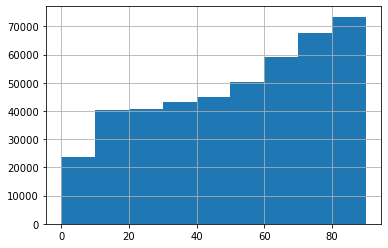

In [81]:
total_df.plane_rotation.hist(bins=9)

In [97]:
# angle_ratio = total_df.angle.apply(lambda x:[float(i) for i in x]).apply(lambda x:min(x)/max(x) if len(x)==2 else np.nan)
# total_df['angle']=total_df.angle.str.strip('[]').str.split(',')
total_df.loc[~total_df.startbpid == '-1.0'].angle.apply(lambda x:[float(i) for i in x]).apply(lambda x:min(x)/max(x) if len(x)==2 else np.nan)

TypeError: ufunc 'invert' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [49]:
100*(total_df[['bifurcation?', 'domain?', 'other_mode?', 'planar_bi', 'orthog_bi', 'other_bi']].sum()/len(total_df)).round(2)

bifurcation?    65.0
domain?         22.0
other_mode?     13.0
planar_bi        8.0
orthog_bi       22.0
other_bi        35.0
dtype: float64

In [72]:
colours = {
    'Domain Branching':'#428bca', 
    'Planar Bifurcation (0-20)':'#5cb85c',
    'Orthogonal Bifucation (70-90)':'#d9534f',
    'Other Bifucation (20 < x <70)':'#ffad60',
    'Other Branching Mode (Not B/D)':'#d896ff'
}

,gen,Domain Branching,Bifurcation,Other Branching Mode (Not B/D),Planar Bifurcation (0-20),Orthogonal Bifucation (70-90),Other Bifucation (20 < x <70),endbpid
0,0,0,0,2911,0,0,0,2911
1,1,12,2882,16,0,0,2882,2910
2,2,3315,324,2200,145,14,165,5839
3,3,1579,7296,1818,323,2753,4220,10693
4,4,2405,18546,1877,2938,2452,13156,22828
5,5,6638,35168,2841,4134,11447,19587,44647
6,6,13841,52748,6077,6998,18463,27287,72666
7,7,19402,58578,10537,7090,21754,29734,88517
8,8,19791,48140,11884,5841,17133,25166,79815
9,9,14639,33553,9500,4137,11682,17734,57692


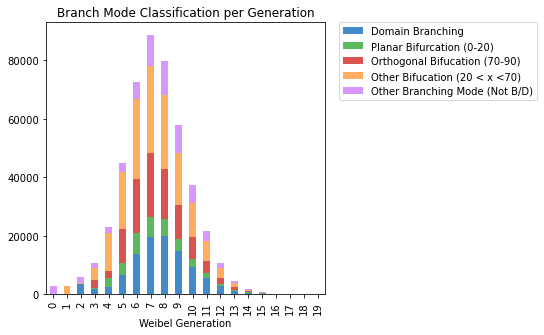

In [73]:


categories = total_df.groupby('gen').agg({
    'domain?': sum,
    'bifurcation?': sum,
    'other_mode?':sum,
    'planar_bi': sum,
    'orthog_bi': sum,
    'other_bi':sum,
    'endbpid': "count"
}).reset_index()

renaming = {"domain?":"Domain Branching",
    "bifurcation?": "Bifurcation",
        "other_mode?":"Other Branching Mode (Not B/D)",
            "planar_bi": "Planar Bifurcation (0-20)",
                "orthog_bi":"Orthogonal Bifucation (70-90)",
                    "other_bi": "Other Bifucation (20 < x <70)"}
categories.rename(columns=renaming, inplace=True)

display(categories)
f, ax = plt.subplots()
ax.set_xticks(np.arange(0, 20, 1))
categories.plot.bar(x='gen', y=['Domain Branching', 'Planar Bifurcation (0-20)','Orthogonal Bifucation (70-90)', 'Other Bifucation (20 < x <70)', 'Other Branching Mode (Not B/D)'],color=colours, stacked=True, ax=ax,grid=False, figsize=(5,5))
ax.set_title("Branch Mode Classification per Generation")
ax.set_xlabel("Weibel Generation")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.savefig("branch_modes_per_gen.jpg", bbox_inches="tight")
plt.show()

,Domain Branching,Planar Bifurcation (0-20),Orthogonal Bifucation (70-90),Other Bifucation (20 < x <70),Other Branching Mode (Not B/D),endbpid,Weibel Generation
0,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0
1,0.004124,0.000000,0.000000,0.990378,0.005498,1.0,1
2,0.567734,0.024833,0.002398,0.028258,0.376777,1.0,2
3,0.147667,0.030207,0.257458,0.394651,0.170018,1.0,3
4,0.105353,0.128702,0.107412,0.576310,0.082224,1.0,4
5,0.148677,0.092593,0.256389,0.438708,0.063632,1.0,5
6,0.190474,0.096304,0.254080,0.375513,0.083629,1.0,6
7,0.219190,0.080098,0.245761,0.335913,0.119039,1.0,7
8,0.247961,0.073182,0.214659,0.315304,0.148894,1.0,8
9,0.253744,0.071708,0.202489,0.307391,0.164668,1.0,9


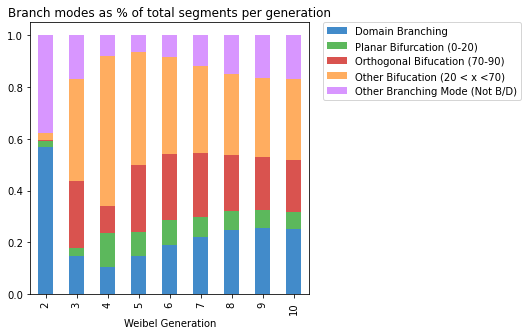

In [75]:
# as % of total per generation
f, ax = plt.subplots()
ax.set_xticks(np.arange(0, 7, 1))
as_percent = categories[['Domain Branching', 'Planar Bifurcation (0-20)','Orthogonal Bifucation (70-90)', 'Other Bifucation (20 < x <70)', 'Other Branching Mode (Not B/D)', 'endbpid']].apply(lambda x: x/x.endbpid, axis=1)
as_percent['Weibel Generation'] = categories['gen']
display(as_percent)
as_percent.loc[(as_percent['Weibel Generation'] <= 10)&(as_percent['Weibel Generation'] >= 2)].plot.bar(x='Weibel Generation', y=['Domain Branching', 'Planar Bifurcation (0-20)','Orthogonal Bifucation (70-90)', 'Other Bifucation (20 < x <70)', 'Other Branching Mode (Not B/D)'], stacked=True,color=colours, ax=ax,grid=False, figsize=(5,5))
ax.set_title('Branch modes as % of total segments per generation')
ax.set_xlabel("Weibel Generation")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.savefig("branch_modes_per_gen_percent.jpg", bbox_inches="tight")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


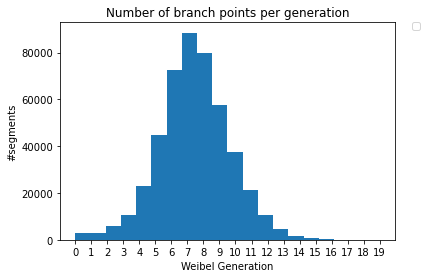

In [76]:
f, ax = plt.subplots()

ax.set_xticks(np.arange(0, 20, 1))

total_df.hist("gen",bins=20,  ax=ax, grid=False, figsize=(5,5))
ax.set_title("Number of branch points per generation")
ax.set_xlabel("Weibel Generation")
ax.set_ylabel('#segments')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.savefig("segments_per_gen.jpg", bbox_inches="tight")
plt.show()

In [53]:
total_df.columns


Index(['idno', 'startbpid', 'anatomicalname', 'centerlinelength',
       'avginnerarea', 'lobe', 'sublobe', 'endbpid', 'angle', 'dircosx',
       'dircosy', 'dircosz', 'weibel_generation', 'thetax_', 'thetaz_',
       'thetay_', 'v_', 'plane_v', 'parent_plane_v', 'plane_rotation',
       'domain?', 'bifurcation?', 'other_mode?', 'planar_bi', 'orthog_bi',
       'other_bi', 'gen'],
      dtype='object')

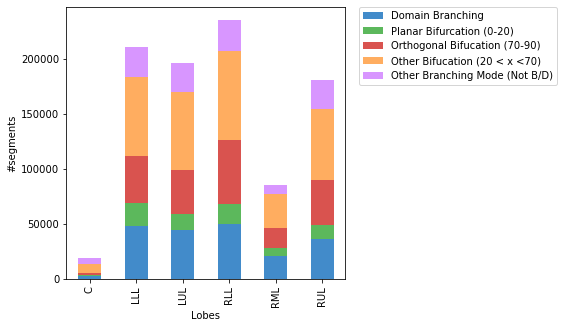

In [78]:

renaming = {"domain?":"Domain Branching",
    "bifurcation?": "Bifurcation",
        "other_mode?":"Other Branching Mode (Not B/D)",
            "planar_bi": "Planar Bifurcation (0-20)",
                "orthog_bi":"Orthogonal Bifucation (70-90)",
                    "other_bi": "Other Bifucation (20 < x <70)"}

renaming_lobes = {0:'C', 1:'LUL', 2:'LLL', 3: 'RUL', 4: 'RML', 5:'RLL'}

f, ax = plt.subplots()
# total_df['lobe'] = total_df.lobe.str.strip("[]").str.split(",")
w_lobes= total_df.explode('lobe')
w_lobes['lobe'] = w_lobes['lobe'].apply(lambda x:float(x)).apply(lambda x:renaming_lobes[x])
grouped = w_lobes.groupby('lobe').agg(sum)[['domain?', 'other_mode?', 'planar_bi', 'orthog_bi', 'other_bi']].reset_index()
grouped.rename(columns=renaming, inplace=True)
grouped.plot.bar(x='lobe', y=['Domain Branching', 'Planar Bifurcation (0-20)','Orthogonal Bifucation (70-90)', 'Other Bifucation (20 < x <70)', 'Other Branching Mode (Not B/D)'],stacked=True, sharey=True,color=colours,  ylabel='#segments', figsize=(5,5), ax=ax)
ax.set_ylabel('#segments')
ax.set_xlabel('Lobes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.savefig("segments_per_lobe.jpg", bbox_inches="tight")
plt.show()

In [ ]:
# merged = df_clean.copy().merge(w_lobes[['idno', 'startbpid', 'endbpid', 'domain?', 'bifurcation?', 'other_mode?', 'planar_bi', 'orthog_bi', 'other_bi']],on=['idno', 'startbpid', 'endbpid'], how='left')


# # In[ ]:


# # merged[['idno', 'startbpid', 'endbpid', 'domain?', 'bifurcation?', 'other_mode?']].apply(lambda x:['domain?', 'bifurcation?', 'other_mode?'][np.argmax(x[['domain?', 'bifurcation?', 'other_mode?']])],axis=1)
# merged[['domain?', 'bifurcation?', 'other_mode?', 'planar_bi', 'orthog_bi', 'other_bi']].fillna(False, inplace=True)
# # merged[['domain?', 'bifurcation?', 'other_mode?']].dropna().astype(int).idxmax(axis=1)
# merged['category'] = merged[['domain?',  'other_mode?', 'planar_bi', 'orthog_bi', 'other_bi']].astype(int).idxmax(axis=1)
